In [1]:
import random
import pandas as pd

In [2]:
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(50000):
    x=random.random()
    d1.append(x)
    y=random.random()
    d2.append(y)
    z=random.random()
    d3.append(z)
    d4.append(2*x+3*y+z)

In [3]:
df=pd.DataFrame({'x1':d1,'x2':d2,'x3':d3,'x4':d4},index=range(0,50000))

In [4]:
import random

# Generate random data
d1 = [random.random() for _ in range(50000)]
d2 = [random.random() for _ in range(50000)]
d3 = [random.random() for _ in range(50000)]
d4 = [2 * x + 3 * y + z for x, y, z in zip(d1, d2, d3)]

# Create DataFrame
df = pd.DataFrame({'x1': d1, 'x2': d2, 'x3': d3, 'x4': d4})

# Define bin edges and labels
bins = [df["x4"].min(), df["x4"].quantile(0.50),df["x4"].max()]
labels = ["Low", "High"]

# Create x5 column with bins
df["x5"] = pd.cut(df["x4"], bins=bins, labels=labels, include_lowest=True)

# Display first few rows
print(df.head())

         x1        x2        x3        x4    x5
0  0.056978  0.931598  0.618594  3.527343  High
1  0.764356  0.117788  0.914000  2.796078   Low
2  0.398388  0.453694  0.702638  2.860495   Low
3  0.633880  0.000080  0.093431  1.361433   Low
4  0.340398  0.356861  0.268727  2.020105   Low


In [5]:
df["x5_encoded"] = df["x5"].map({"Low": -1, "High": 1})

In [6]:
df["x5_encoded"] = df["x5_encoded"].astype(int)

In [7]:
X = df.iloc[:,0:3]
Y = df.iloc[:,5]

In [8]:
Y

0        1
1       -1
2       -1
3       -1
4       -1
        ..
49995   -1
49996   -1
49997   -1
49998    1
49999   -1
Name: x5_encoded, Length: 50000, dtype: int32

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
df.head()

,x1,x2,x3,x4,x5,x5_encoded
0,0.056978,0.931598,0.618594,3.527343,High,1
1,0.764356,0.117788,0.914000,2.796078,Low,-1
2,0.398388,0.453694,0.702638,2.860495,Low,-1
3,0.633880,0.000080,0.093431,1.361433,Low,-1
4,0.340398,0.356861,0.268727,2.020105,Low,-1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
Y

0        1
1       -1
2       -1
3       -1
4       -1
        ..
49995   -1
49996   -1
49997   -1
49998    1
49999   -1
Name: x5_encoded, Length: 50000, dtype: int32

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(9, input_dim=3, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')  # 3 output classes: -1, 0, 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use sparse categorical crossentropy
              metrics=['accuracy'])

D:\ju\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
h1=model.fit(X_train, y_train, epochs=20)

Epoch 1/20


D:\ju\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4962 - loss: -1.6064
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5025 - loss: -75.7109
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5017 - loss: -361.4842
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5020 - loss: -937.7131
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4980 - loss: -1812.7909
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4986 - loss: -3070.7405
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5011 - loss: -4638.6240
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5002 - loss: -6683.5430
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4997 - loss: -9231.7891
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4979 - loss: -12236.4736
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4977 - loss: -15965.9766
Ep

In [15]:
y_pred=model.predict(X_test)

126/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

D:\ju\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


D:\ju\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [16]:
from sklearn.metrics import r2_score,accuracy_score

In [17]:
accuracy_score(y_pred, y_test)

0.5029

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

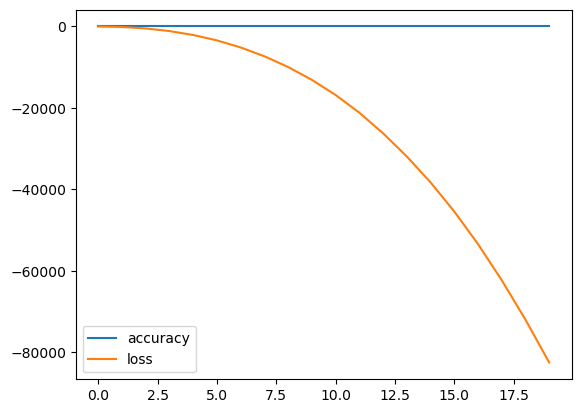

In [23]:
metrics_df = pd.DataFrame(h1.history)
metrics_df.plot()
plt.show()